In [4]:
import pandas as pd

In [108]:
df1=pd.read_csv('combine_sorted_count.bed', delimiter='	', header=-1, names= ['Chr', 'TSS','TES', 'A','B', 'C'])
df1.shape

(415, 6)

In [109]:
df1.loc[df1.index[df1['A']>1], ['A']]=1
df1.loc[df1.index[df1['B']>1], ['B']]=1
df1.loc[df1.index[df1['C']>1], ['C']]=1

In [110]:
df1['ABC']=df1['A']+df1['B']+df1['C']
df1['AB']=df1['A']+df1['B']
df1['BC']=df1['B']+df1['C']
df1['AC']=df1['A']+df1['C']
df1.head()

Chr       TSS       TES  A  B  C  ABC  AB  BC  AC
0  chr1  16678696  16679061  1  0  0    1   1   0   1
1  chr1  20730584  20730997  1  0  0    1   1   0   1
2  chr1  24012136  24012461  1  0  0    1   1   0   1
3  chr1  36823939  36824266  1  0  0    1   1   0   1
4  chr1  51641738  51642253  1  0  0    1   1   0   1

In [133]:
print("A",df1['A'].value_counts()[1])
print("B",df1['B'].value_counts()[1])
print("C",df1['C'].value_counts()[1])
print("AB",df1['AB'].value_counts()[2])
print("AC",df1['AC'].value_counts()[2])
print("BC",df1['BC'].value_counts()[2])
print("ABC",df1['ABC'].value_counts()[3])

('A', 317)
('B', 165)
('C', 85)
('AB', 110)
('AC', 37)
('BC', 32)
('ABC', 27)


In [150]:
#df1.index[df1['C']>1]

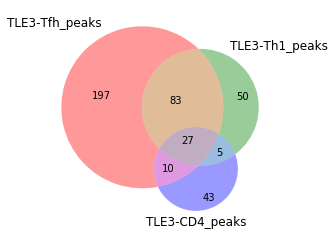

In [145]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

##
center=df1['ABC'].value_counts()[3]
AB_com=df1['AB'].value_counts()[2]-center
AC_com=df1['AC'].value_counts()[2]-center
BC_com=df1['BC'].value_counts()[2]-center

A_solo=df1['A'].value_counts()[1]-AB_com-AC_com-center
B_solo=df1['B'].value_counts()[1]-AB_com-BC_com-center
C_solo=df1['C'].value_counts()[1]-AC_com-BC_com-center


v=venn3(subsets = (A_solo, B_solo, AB_com, C_solo,AC_com,BC_com,center), \
        set_labels = ('TLE3-Tfh_peaks', 'TLE3-Th1_peaks', 'TLE3-CD4_peaks'))
#c=venn3_circles(subsets = (10, 8, 22, 6,9,4,2), linestyle='dashed', linewidth=1, color="grey")
plt.show()
